In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path
sys.path.append('../scenes/')
import syndiff as sd 

<IPython.core.display.Javascript object>


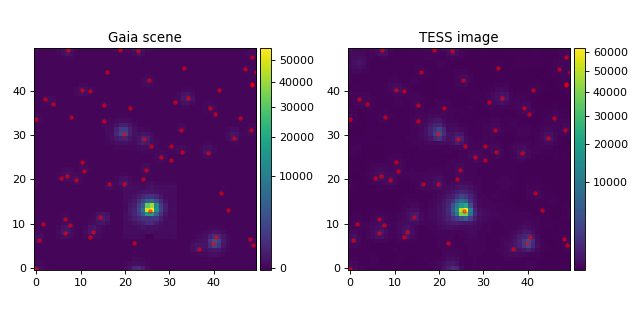

In [31]:
# single star
ra =  95.4586
dec = -51.2377
# SN2018fhw
ra = 64.5261250     
dec = -63.6150694
# SN2019esa
#ra = 118.7537042
#dec = -76.4119750
     
# GRB 
ra = 30.26933 
dec = 24.50988

size = 20
scene,tpf = sd.Gaia_scene(ra,dec,50,Maglim=17,Interpolate=True,
                          FFT=False,PRF=True,Plot = True,Save='Gaia_scene.pdf')

In [3]:
bkg = np.ones_like(scene[0])
for s in scene:
    bkg = bkg * (s <= 5)

<IPython.core.display.Javascript object>


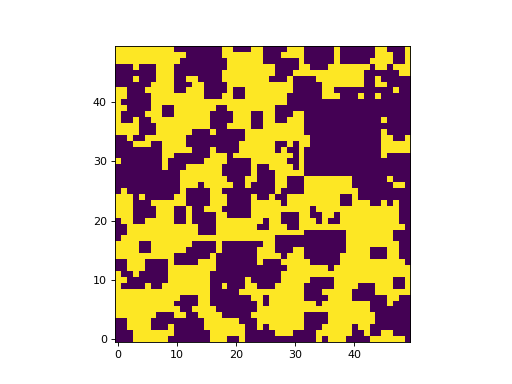

In [4]:
plt.figure()
plt.imshow(bkg,origin='lower')

In [9]:
from photutils import Background2D, MedianBackground
from astropy.stats import SigmaClip

In [34]:
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = MedianBackground()
bkgs = Background2D(tpf.flux[0], (5, 5), filter_size=(3, 3),
                   sigma_clip=sigma_clip, bkg_estimator=bkg_estimator,mask=(bkg==0))

<IPython.core.display.Javascript object>


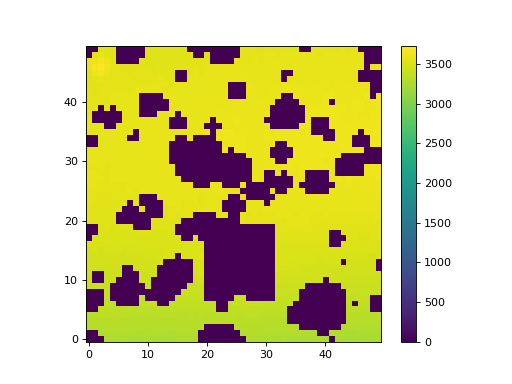

In [18]:
plt.figure()
plt.imshow(tpf.flux[500]*(bkg*1.0),origin='lower')
plt.colorbar()

In [11]:
from scipy import interpolate

In [32]:
x,y = np.where(np.isfinite(bkg))
xind, yind = np.where(bkg > 0)
x2 = x.copy()
y2 = y.copy()
#x = x[xind]
#y = y[yind]
#X, Y = np.meshgrid(x,y)
#x=X.ravel()	 #Flat input into 1d vector
#y=Y.ravel()

z = tpf.flux[500]*
z = z.ravel()
x = list(x[np.isfinite(z)])
y = list(y[np.isfinite(z)])
z = list(z[np.isfinite(z)])

znew = interpolate.griddata((x, y), z, (x2, y2), method='cubic')

QhullError: QH6013 qhull input error: input is less than 3-dimensional since it has the same x coordinate

While executing:  | qhull d Qz Qbb Qc Qt Q12
Options selected for Qhull 2015.2.r 2016/01/18:
  run-id 1161743269  delaunay  Qz-infinity-point  Qbbound-last  Qcoplanar-keep
  Qtriangulate  Q12-no-wide-dup  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood  _max-width 49  Error-roundoff 6.8e-14  _one-merge 4.8e-13
  Visible-distance 1.4e-13  U-coplanar-distance 1.4e-13  Width-outside 2.7e-13
  _wide-facet 8.2e-13


In [25]:
np.mgrid(0)

(1702,)

In [43]:
x = np.arange(0,bkg.shape[0],1)
y = np.arange(0,bkg.shape[1],1)

X, Y = np.meshgrid(x,y)
x=X.ravel()			  #Flat input into 1d vector
y=Y.ravel()

z = tpf.flux[500]*bkg
z = z.ravel()
ind = np.where(z > 0)
#x = list(x[np.isfinite(z)])
#y = list(y[np.isfinite(z)])
#z = list(z[np.isfinite(z)])

znew = interpolate.griddata((x[ind], y[ind]), z[ind], (x[None,:], y[:,None]), method='cubic')

<IPython.core.display.Javascript object>


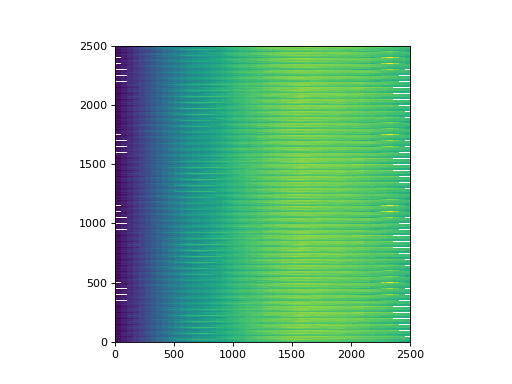

In [44]:
plt.figure()
plt.imshow(znew,origin='lower')

In [50]:
fun = interpolate.interp2d(x[ind], y[ind], z[ind], kind='linear')

/Users/ryanr/miniconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=44,43 m=1702 fp=3062.216434 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [51]:
new = fun(x,y)

<IPython.core.display.Javascript object>


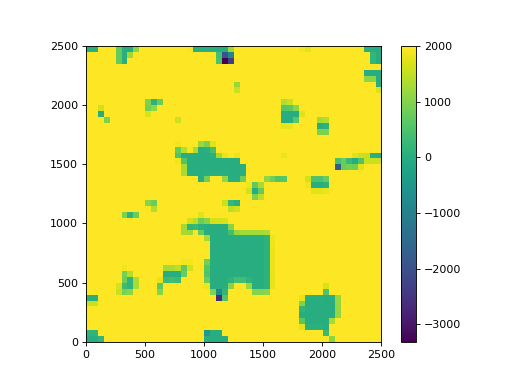

In [53]:
plt.figure()
plt.imshow(new,origin='lower',vmax=2000)
plt.colorbar()

In [84]:
#def Scene_bkg_estimate(Scene,tpf)

x = np.arange(0, bkg.shape[1])
y = np.arange(0, bkg.shape[0])
#mask invalid values
arr = tpf.flux[100]
arr[bkg==0] = np.nan
arr = np.ma.masked_invalid(arr)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~arr.mask]
y1 = yy[~arr.mask]
newarr = arr[~arr.mask]

GD1 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy),method='linear')

<IPython.core.display.Javascript object>


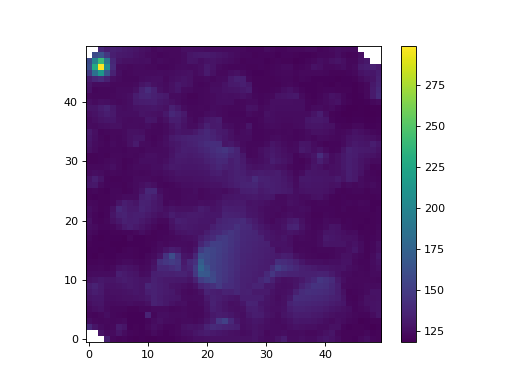

In [85]:
plt.figure()
plt.imshow(GD1,origin='lower')
plt.colorbar()

<IPython.core.display.Javascript object>


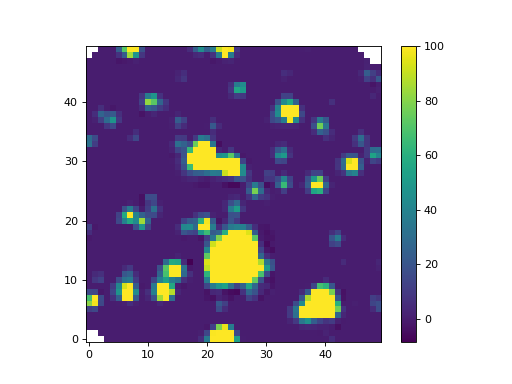

In [86]:
plt.figure()
plt.imshow((tpf.flux[100]-GD1),origin='lower',vmax=100)
plt.colorbar()

In [7]:
def Scene_bkg_estimate(Scene,tpf,Custom_mask = None,Limit = 5):
    
    mask = np.ones_like(Scene[0])
    for s in Scene:
        mask = mask * (s <= Limit)
    if type(Custom_mask) != type(None):
        print('additional mask')
        mask = mask * Custom_mask
    bkg = np.zeros_like(tpf.flux)
    x = np.arange(0, mask.shape[1])
    y = np.arange(0, mask.shape[0])
    #mask invalid values
    for i in range(len(tpf.flux)):
        arr = tpf.flux[i]
        arr[mask==0] = np.nan
        arr = np.ma.masked_invalid(arr)
        xx, yy = np.meshgrid(x, y)
        #get only the valid values
        x1 = xx[~arr.mask]
        y1 = yy[~arr.mask]
        newarr = arr[~arr.mask]

        estimate = interpolate.griddata((x1, y1), newarr.ravel(),
                                  (xx, yy),method='linear')
        bkg[i] = estimate
        
    return bkg

In [32]:
cus = np.ones_like(tpf.flux[0])
cus[20:28,20:28] = 0
test = Scene_bkg_estimate(scene,tpf,Custom_mask=cus)

additional mask


In [102]:
from matplotlib import gridspec
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator


<IPython.core.display.Javascript object>


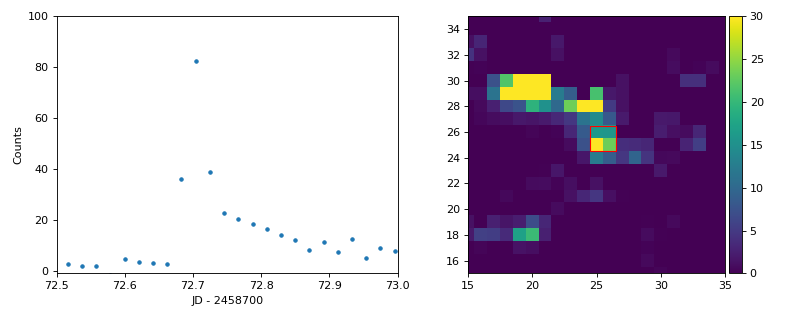

In [105]:
sub = tpf.flux-test
ref = np.nanmedian(sub[:100,25:27,25:27],axis=(0))
lc = np.nansum(sub[:,25:27,25:27]-ref,axis=(1,2))

#sub[sub<0] = np.nan
plt.figure(figsize=(10,4))
#plt.plot(tpf.astropy_time.jd-2457000,tpf.flux[:,26,26]/np.nanmax(tpf.flux[:,26,26]),'.')
#plt.plot(test[:,24,24])

plt.subplot(1,2,1)
#plt.plot(tpf.astropy_time.jd-2458700,sub[:,25,25]-np.nanmedian(sub[:100,25,25]),'.')
plt.plot(tpf.astropy_time.jd-2458700,lc-np.nanmedian(lc[:100]),'.')
plt.xlim(72.5,73)
plt.ylim(-1,100)
plt.ylabel('Counts')
plt.xlabel('JD - 2458700')
plt.subplot(1,2,2)
im = plt.imshow(sub[ind]-sub[10],origin='lower',vmin=0,vmax=30)
plt.ylim(15,35)
plt.xlim(15,35)
rect = patches.Rectangle((25-.5,25-.5),2,2,linewidth=1,edgecolor='r',facecolor='none')
ax = plt.gca()
ax.add_patch(rect)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.colorbar(im, cax=cax)

plt.tight_layout()
plt.savefig('grb_sndiff_bkd.pdf')

In [49]:
ind =np.where(1772.7 <= tpf.astropy_time.jd-2457000)[0][0]

<IPython.core.display.Javascript object>


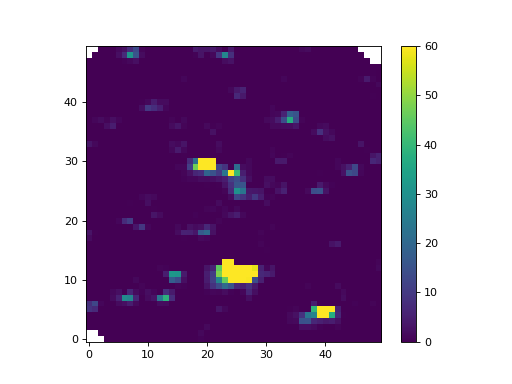

In [65]:
plt.figure()
plt.imshow(sub[ind]-sub[10],origin='lower',vmin=0,vmax=60)
plt.colorbar()

<IPython.core.display.Javascript object>


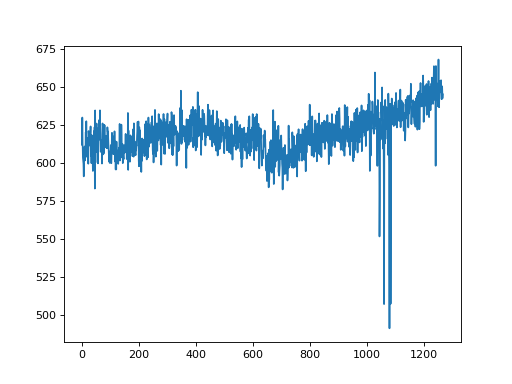

<IPython.core.display.Javascript object>


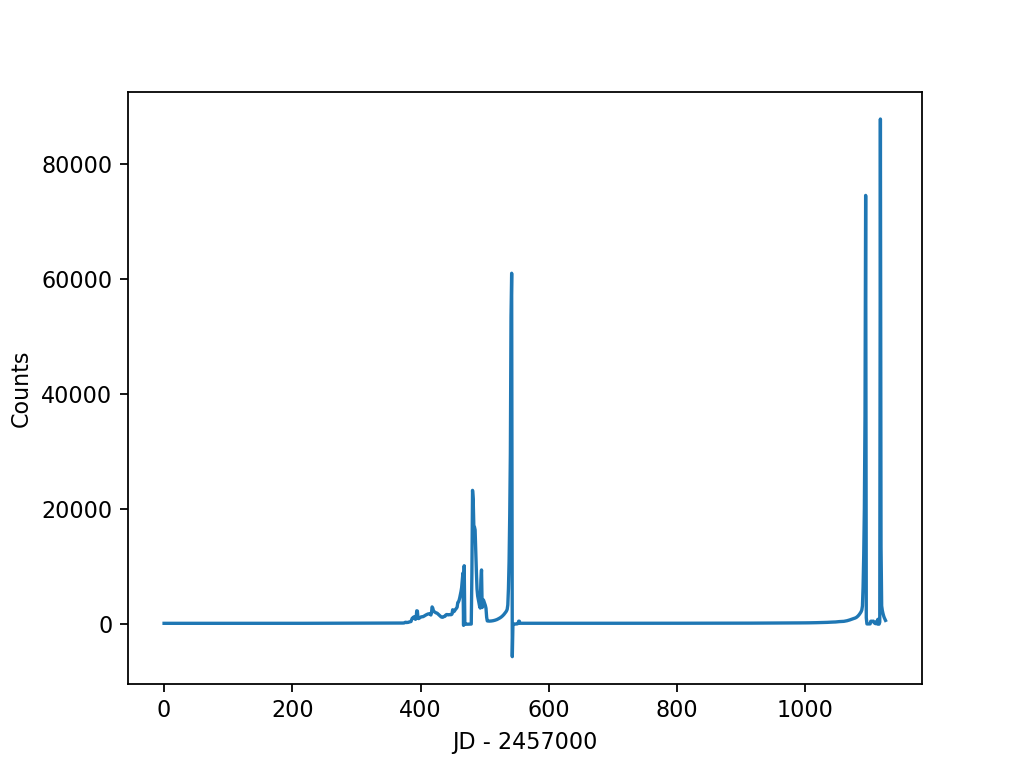

Text(0.5, 0, 'JD - 2457000')

In [128]:
plt.figure()
#plt.plot(tpf.astropy_time.jd-2457000,tpf.flux[:,26,26]/np.nanmax(tpf.flux[:,26,26]),'.')
plt.plot(test[:,25,25])
#plt.plot(sub[:,25,25]-np.nanmedian(sub[:100,25,25]),'.')
#plt.xlim(1772.6,1773)
#plt.ylim(-1,40)
plt.ylabel('Counts')
plt.xlabel('JD - 2457000')

<IPython.core.display.Javascript object>


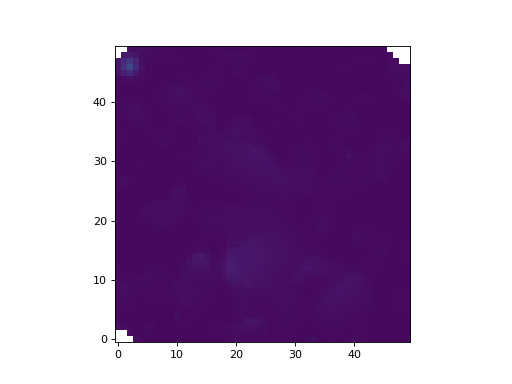

In [111]:
fig, ax = plt.subplots()

im = plt.imshow(test[0],origin='lower',vmin=100,vmax=1000)

In [112]:
im.set_data(test[1])

<IPython.core.display.Javascript object>


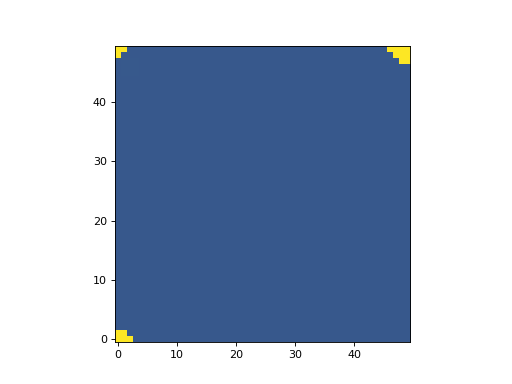

In [124]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from astropy.visualization import (SqrtStretch, ImageNormalize)

fig, ax = plt.subplots()
norm = ImageNormalize(vmin=np.nanmin(test), 
                      vmax=np.nanmax(test), stretch=SqrtStretch())
im = plt.imshow(test[0],origin='lower',norm=norm)


def init():  # only required for blitting to give a clean slate.
    im.set_data(np.nan * np.zeros_like(test[0]))
    return im,


def animate(i):
    im.set_data(test[i])
    return im,


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(test), blit=True)
anim.save("test_movie.mp4")

In [121]:
anim.save("test_movie.mp4")